![](https://raw.githubusercontent.com/cengineer13/modern_computer_vision/main/LOGO.png)

# **Optical Character Recognition with PyTesseract & EASY OCR**

- In this lesson we'll implement OCR on EASY OCR

https://github.com/jaidedai/easyocr

https://pyimagesearch.com/2020/09/14/getting-started-with-easyocr-for-optical-character-recognition/

## **EASY OCR** 

Bu library pytorchda train bolgani uchun torch and torchvision ornatilgan bolishi lozim

In [4]:
# import the necessary packages
from matplotlib import pyplot as plt
import easyocr
import pandas as pd
import cv2
import time

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [5]:
#OpenCV ning putText funktsiyasi ASCII bo'lmagan belgilarni ko'rsatolmasligini hisobga olsak, 
#ushbu potentsial bezovta qiluvchi belgilarni tahlil qilish uchun tezkor qulaylik funksiyasiniqollaymiz.

def cleanup_text(text):
    # strip out non-ASCII text so we can draw the text on the image
    # using OpenCV
    return "".join([c if ord(c) < 128 else "" for c in text]).strip()

In [6]:
def thresholding_image(image):
    from skimage.filters import threshold_local
    #HSV ga o'tkizib faqat value channelini olamiz
    V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
    #imshow("Value channel", V, size = 48) 

    T = threshold_local(V, block_size=35, offset=10, method='gaussian')
    #True va False dan iborat rasm massivni 1 va 0 ga aylantirib olamiz,
    thresh = (V > T).astype('uint8') * 255 #255 ga ko'paytirib ko'proq brightness qoshamiz
    
    return thresh


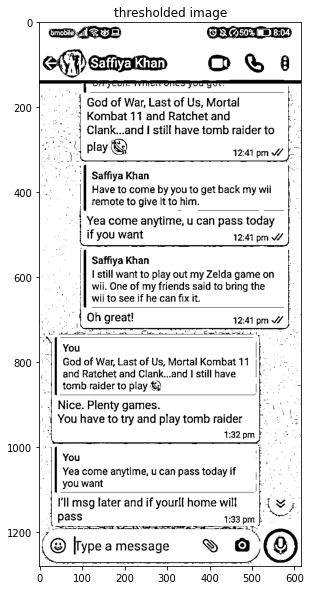

Completed in 4.272917747497559 seconds
[[24, 12], [192, 12], [192, 38], [24, 38]] bmobile ,ill < 82 0.1144446674969115
[[396, 12], [510, 12], [510, 38], [396, 38]] "'0 ^ (50% 0.48180130516899655
[[546, 12], [594, 12], [594, 36], [546, 36]] 8.04 0.9925526976585388
[[114, 74], [302, 74], [302, 122], [114, 122]] Saffiya Khan 0.7960116297227916
[[110, 174], [200, 174], [200, 204], [110, 204]] God of 0.989818846675026
[[254, 173], [476, 173], [476, 206], [254, 206]] Last of Us, Mortal 0.9024053431647319
[[110, 206], [454, 206], [454, 238], [110, 238]] Kombat 11 and Ratchet and 0.7717439337708112
[[110, 240], [250, 240], [250, 270], [110, 270]] Clank__and 0.8842328096431962
[[264, 238], [558, 238], [558, 270], [264, 270]] still have tomb raider to 0.9725837742250267
[[107, 279], [167, 279], [167, 315], [107, 315]] play 0.8741192805555608


In [7]:
image = cv2.imread("Datasets/images/OCR Samples/whatsapp_conv.jpeg")

thresh_image = thresholding_image(image)
imshow('thresholded image', thresh_image)

#initialize list of languages with comma separated
langs = ['en']  

#Reader classidan obyekt olamiz. 
reader = easyocr.Reader(langs) #langs doimo list qlib uzatiladi. Hatto 1 dona til bo'lsa ham

ts = time.time()
results = reader.readtext(image)
te = time.time()
td = te - ts
print(f'Completed in {td} seconds')


#readtext funksiyasi bbox, text, prob qiymatni list sifatida qaytaradi. 
for (bbox, text, prob) in results[:10]: #:10 for demostration uchun 
    print(bbox, text, prob) 

8.04
Saffiya Khan
God of
Last of Us, Mortal
Kombat 11 and Ratchet and
Clank__and
still have tomb raider to
play
12.41 pm
Saffiya Khan
Have to come by you to get back my wii
remote to give it to him:
Yea come anytime, U can pass today
if you want
1241 pm
Saffiya Khan
still want to play out my Zelda game on
wii. One of my friends said to
the
wii to see if he can fix it.
Oh greatl
12.41 pm
You
God of War; Last of Us, Mortal Kombat 11
and Ratchet and Clank__and
still have
tomb raider to play
Nice. Plenty games.
You have to try and play tomb raider
1.32 pm
Yea come anytime; U can pass today if
you want
IIl msg later and if yourll home will
pass
1.33 pm
IType a message
War;
bring
You


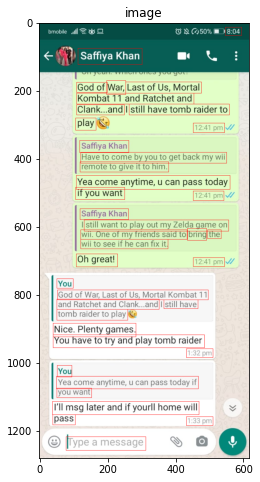

In [11]:
img_copy = image.copy()

#threshold for controlling 
threshold = 0.5
for (bbox, text, prob) in results: 
    #print("Probablity {:.4f}: {}".format(prob, text)) 
    if prob > threshold: 
        
        #unpack bbox. list ichida yana list bolganligi uchun .  
        (t_l, t_r,  b_r, b_l) = bbox

        #rectangle burchak coordinatalarini tuplega yozib olamiz
        #nuqtalar clockwise ravishda ketadi
        top_l = (int(t_l[0]), int(t_l[1]))
        top_r = (int(t_r[0]), int(t_r[1]))
        bottom_r = (int(b_r[0]),int(b_r[1]))
        bottom_l = (int(b_l[0]),int(b_l[1]))

        # cleanup the text and draw the box surrounding the text along
        # with the OCR'd text itself
        text = cleanup_text(text) 
        cv2.rectangle(img_copy, top_l, bottom_r, (0,0,255), 1)
        print(text)
    
imshow('image', img_copy, size = 8)
    
    
    
    

### Draw over text 

 Probability of Text: 11.444% OCR'd Text: bmobile ,ill < 82
 Probability of Text: 48.180% OCR'd Text: "'0 ^ (50%
 Probability of Text: 99.255% OCR'd Text: 8.04
 Probability of Text: 79.601% OCR'd Text: Saffiya Khan
 Probability of Text: 98.982% OCR'd Text: God of
 Probability of Text: 90.241% OCR'd Text: Last of Us, Mortal
 Probability of Text: 77.174% OCR'd Text: Kombat 11 and Ratchet and
 Probability of Text: 88.423% OCR'd Text: Clank__and
 Probability of Text: 97.258% OCR'd Text: still have tomb raider to
 Probability of Text: 87.412% OCR'd Text: play
 Probability of Text: 97.826% OCR'd Text: 12.41 pm
 Probability of Text: 99.956% OCR'd Text: Saffiya Khan
 Probability of Text: 52.238% OCR'd Text: Have to come by you to get back my wii
 Probability of Text: 56.144% OCR'd Text: remote to give it to him:
 Probability of Text: 79.288% OCR'd Text: Yea come anytime, U can pass today
 Probability of Text: 97.838% OCR'd Text: if you want
 Probability of Text: 99.124% OCR'd Text: 1241 pm
 Pr

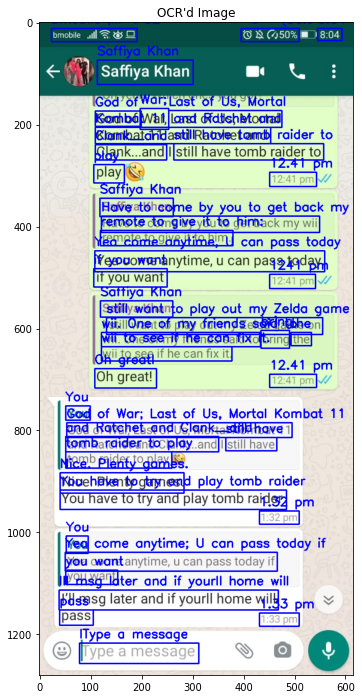

In [12]:
all_text = []

# iterate over our extracted text 
for (bbox, text, prob) in results:
    # display the OCR'd text and the associated probability of it being text
    print(f" Probability of Text: {prob*100:.3f}% OCR'd Text: {text}")

    # get the bounding box coordinates
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # Remove non-ASCII characters from the text so that
    # we can draw the box surrounding the text overlaid onto the original image
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    all_text.append(text)
    cv2.rectangle(image, tl, br, (255, 0, 0), 2)
    cv2.putText(image, text, (tl[0], tl[1] - 10),
      cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# show the output image
imshow("OCR'd Image", image, size = 12)